## FOR COMP90024 ASSIGNMENT 2
### BY TEAM 45:
- William Chen 1400081
- Petr Andreev 1375858
- Rafsan Al Mamun 1407776
- Ojaswi Dheer 1447227

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import folium


In [90]:
# Load the dataset from CSV
columns = ['date', 'time', 'location_name', 'latitude', 'longitude', 'value', 'parameter_name']
data = pd.read_csv('../data/2022_All_sites_air_quality_hourly_avg.csv', usecols=columns)

# Filter the DataFrame to select only specific parameter names
selected_parameters = ['PM2.5']
filtered_data = data[data['parameter_name'].isin(selected_parameters)]

In [91]:
# Reset the index
filtered_data.reset_index(drop=True, inplace=True)

# Convert 'date' column to datetime data type
filtered_data['date'] = pd.to_datetime(filtered_data['date'])

# Extract only the date portion from the datetime column
filtered_data['date'] = filtered_data['date'].dt.date

# Filter the DataFrame to keep only rows between 1 Jan 2022 and 31 Dec 2022
start_date = pd.to_datetime('2022-01-01').date()
end_date = pd.to_datetime('2022-12-31').date()

filtered_data = filtered_data[(filtered_data['date'] >= start_date) & (filtered_data['date'] <= end_date)]

/var/folders/5d/r2fbb4916pb12_95cc389pv00000gn/T/ipykernel_46053/848826504.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  filtered_data['date'] = pd.to_datetime(filtered_data['date'])
/var/folders/5d/r2fbb4916pb12_95cc389pv00000gn/T/ipykernel_46053/848826504.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = pd.to_datetime(filtered_data['date'])
/var/folders/5d/r2fbb4916pb12_95cc389pv00000gn/T/ipykernel_46053/848826504.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [92]:
# Group by suburb, parameter_name, and month, then sum the values
summed_data = filtered_data.groupby(['location_name', 'parameter_name', 'latitude', 'longitude'])['value'].mean().reset_index()
summed_data

,location_name,parameter_name,latitude,longitude,value
0,Alphington,PM2.5,-37.778408,145.030600,6.622210
1,Bendigo,PM2.5,-36.778400,144.300069,3.321866
2,Box Hill,PM2.5,-37.828728,145.132400,5.096341
3,Brighton,PM2.5,-37.913547,144.998000,6.893843
4,Campbellfield,PM2.5,-37.679276,144.965717,6.479662
5,Churchill,PM2.5,-38.304314,146.414932,5.841217
6,Footscray,PM2.5,-37.803709,144.869342,5.760731
7,Geelong South,PM2.5,-38.173560,144.370300,4.394554
8,Melbourne CBD,PM2.5,-37.807396,144.970000,7.273835
9,Melton,PM2.5,-37.706455,144.566900,5.519013


In [93]:
# Define the center of the map
map_center = [-37.82, 145.4]

# Create a map centered around Melbourne
map_melbourne = folium.Map(location=map_center, zoom_start=9, width=1000, height=1000)

# Add title to the map
title_html = '<h3 align="left" style="font-size:20px"><b>Air Quality (PM2.5) in Victoria</b></h3>'
map_melbourne.get_root().html.add_child(folium.Element(title_html))

# Define a colormap
colormap = folium.LinearColormap(colors=['yellow','orange', 'red', 'black'], 
                                  vmin=summed_data['value'].min(), 
                                  vmax=summed_data['value'].max(),
                                  caption='PM2.5')

# Add CircleMarkers for each location
for index, row in summed_data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['value'] * 2.5,  # Multiplying by 2.5 to make the circles visible
        color=colormap(row['value']),
        fill=True,
        fill_color=colormap(row['value']),
        fill_opacity=0.7,
        popup=folium.Popup(f"{row['location_name']}: PM2.5 = {row['value']:.1f}", parse_html=True),
    ).add_to(map_melbourne)

# Add the color scale
colormap.add_to(map_melbourne)

# Display the map
map_melbourne


In [94]:
map_center = [-37.82, 145.4]  
# Create a map centered around Melbourne
map_melbourne = folium.Map(location=map_center, zoom_start=9, width=1000, height=1000)

# Add title to the map
title_html = '<h3 align="left" style="font-size:20px"><b>Air Quality (PM2.5) in Victoria</b></h3>'
map_melbourne.get_root().html.add_child(folium.Element(title_html))

# Define a colormap
colormap = folium.LinearColormap(colors=['orange', 'red', 'black'], 
                                  vmin=summed_data['value'].min(), 
                                  vmax=summed_data['value'].max(),
                                  caption='PM2.5')


# Add CircleMarkers for each location
for index, row in summed_data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['value'] * 3,
        color=colormap(row['value']),
        fill=True,
        fill_color=colormap(row['value']),
        fill_opacity=0.7,
        popup=folium.Popup(f"{row['location_name']}: PM2.5 = {row['value']:.1f}", parse_html=True),
    ).add_to(map_melbourne)
    
    # Add PM2.5 values inside CircleMarkers
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        icon=folium.DivIcon(html=f"<div style='font-size: 8pt; color: white;'>{row['value']:.1f}</div>"),
        icon_anchor=(0, 0)
    ).add_to(map_melbourne)

# Add the color scale
colormap.add_to(map_melbourne)

# Display the map
map_melbourne


### **Correlation Analysis between Lung Disease and PM 2.5** ###

In [95]:
# Set display options for pandas DataFrame
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)        # Set display width

In [96]:
# Load the datasets
male_lung_cancer_data = pd.read_csv('../data/lung_disease_dataset/aihw_cimar_mortality_males_gccsa_2009.csv')
female_lung_cancer_data = pd.read_csv('../data/lung_disease_dataset/aihw_cimar_mortality_females_gccsa_2009.csv')
all_lung_cancer_data = pd.read_csv('../data/lung_disease_dataset/aihw_cimar_mortality_persons_gccsa_2009.csv')
census_by_cob_data = pd.read_csv('../data/lung_disease_dataset/abs_2021census_g21a_aust_gccsa.csv')
census_by_inc_emp_data = pd.read_csv('../data/lung_disease_dataset/abs_2021census_g21b_aust_gccsa.csv')

In [97]:
# Merge mortality and census datasets based on location
merged_data_1 = all_lung_cancer_data.merge(census_by_cob_data, how='inner', on=['gccsa_code', 'gccsa_name'])
# merged_data_1

In [98]:
lung_cancer_df = merged_data_1[merged_data_1['gccsa_code'].isin(['2GMEL', '2RVIC'])]
# lung_cancer_df

In [99]:
region_map = {
    'Alphington': 'Greater Melbourne',
    'Bendigo': 'Rest of Vic',
    'Box Hill': 'Greater Melbourne',
    'Brighton': 'Greater Melbourne',
    'Campbellfield': 'Greater Melbourne',
    'Churchill': 'Rest of Vic',
    'Footscray': 'Greater Melbourne',
    'Geelong South': 'Rest of Vic',
    'Melbourne CBD': 'Greater Melbourne',
    'Melton': 'Greater Melbourne',
    'Moe': 'Rest of Vic',
    'Morwell East': 'Rest of Vic',
    'Morwell South': 'Rest of Vic',
    'Newborough': 'Rest of Vic',
    'Traralgon': 'Rest of Vic'
}

In [100]:
pm25_df = summed_data[['location_name', 'value']].copy()
pm25_df.rename(columns={'value': 'PM2.5'}, inplace=True)

# Map region to the PM2.5 dataframe
pm25_df.loc[:, 'region'] = pm25_df['location_name'].map(region_map)
pm25_df

,location_name,PM2.5,region
0,Alphington,6.622210,Greater Melbourne
1,Bendigo,3.321866,Rest of Vic
2,Box Hill,5.096341,Greater Melbourne
3,Brighton,6.893843,Greater Melbourne
4,Campbellfield,6.479662,Greater Melbourne
5,Churchill,5.841217,Rest of Vic
6,Footscray,5.760731,Greater Melbourne
7,Geelong South,4.394554,Rest of Vic
8,Melbourne CBD,7.273835,Greater Melbourne
9,Melton,5.519013,Greater Melbourne


In [101]:
# Group by region and calculate the mean of PM2.5 values
pm25_aggregated = pm25_df.groupby(['region'])['PM2.5'].mean().reset_index()  ##
pm25_aggregated

,region,PM2.5
0,Greater Melbourne,6.235091
1,Rest of Vic,5.289477


In [102]:
merged_df = pd.merge(lung_cancer_df, pm25_aggregated, left_on='gccsa_name', right_on='region', how='inner')
merged_df

,gccsa_code,gccsa_name,Lung cancer total mortality,Lung cancer population,Lung cancer rate per 100k,All cancer total mortality,All cancer population,Total asthma,Employed asthma,Australian asthma,Total COPD,Australian COPD,Foreigner asthma,Foreigner COPD,region,PM2.5
0,2GMEL,Greater Melbourne,6377,20904141,30.51,35887,20904141,386347,208830,292521,58925,37523,91496,20287,Greater Melbourne,6.235091
1,2RVIC,Rest of Vic,3138,6834239,45.92,17475,6834239,156014,73533,140299,38195,31287,13405,5734,Rest of Vic,5.289477


In [103]:
columns_list = [
    'gccsa_name',
    'Lung cancer total mortality',
    'All cancer total mortality',
    'Total COPD',
    'Australian COPD',
    'Foreigner asthma',
    'Foreigner COPD'
]
df_plot = merged_df[columns_list]
df_plot


,gccsa_name,Lung cancer total mortality,All cancer total mortality,Total COPD,Australian COPD,Foreigner asthma,Foreigner COPD
0,Greater Melbourne,6377,35887,58925,37523,91496,20287
1,Rest of Vic,3138,17475,38195,31287,13405,5734


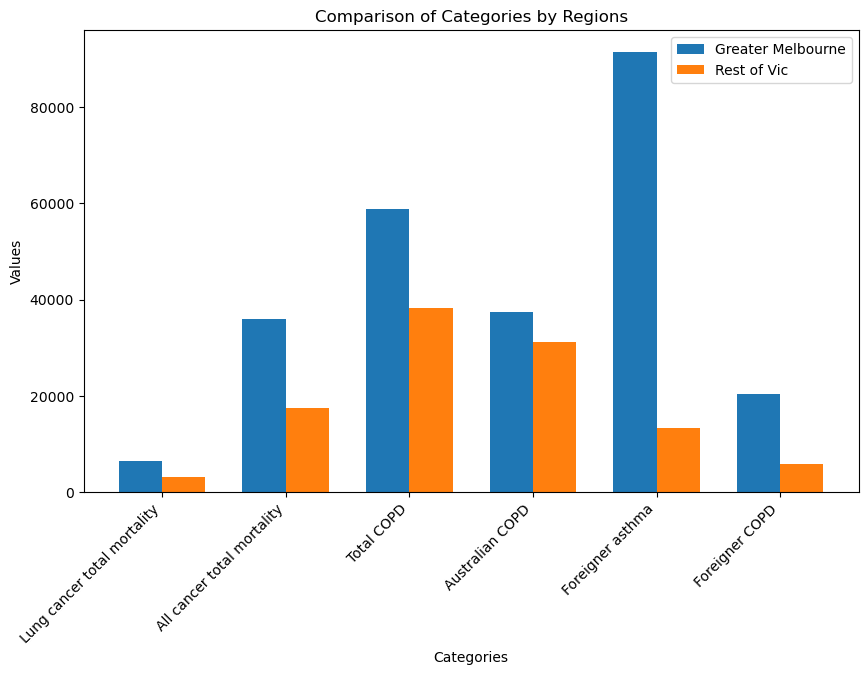

In [104]:
regions = df_plot['gccsa_name']
categories = df_plot.columns[1:]
data = df_plot.iloc[:, 1:].values

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(categories))

bar1 = ax.bar(index, data[0], bar_width, label=regions[0])
bar2 = ax.bar([i + bar_width for i in index], data[1], bar_width, label=regions[1])

ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.set_title('Comparison of Categories by Regions')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.legend()


plt.show()

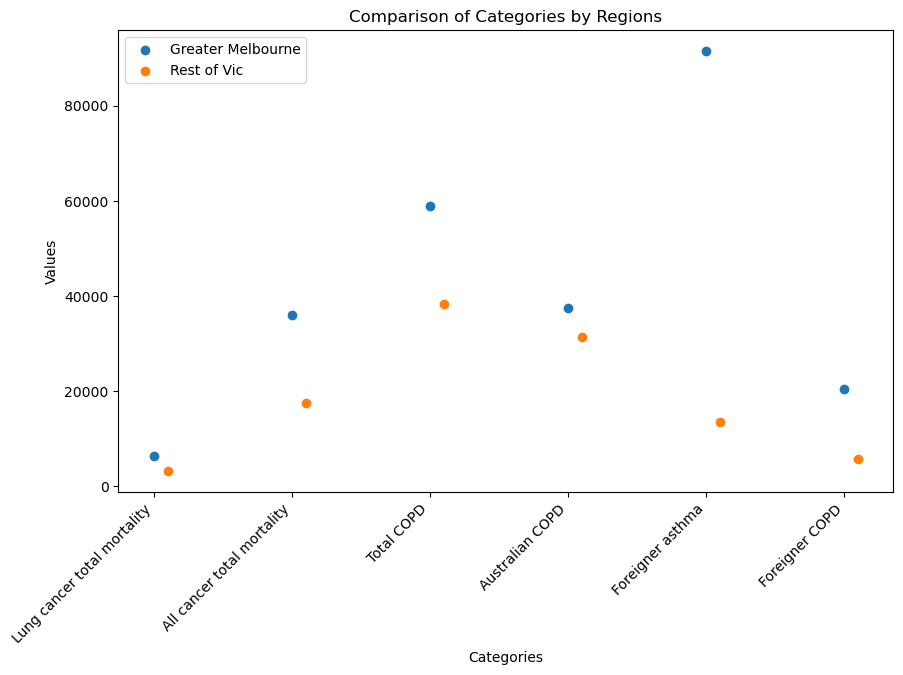

In [105]:
regions = df_plot['gccsa_name']
categories = df_plot.columns[1:]
data = df_plot.iloc[:, 1:].values

fig, ax = plt.subplots(figsize=(10, 6))

index = range(len(categories))

scatter1 = ax.scatter(index, data[0], label=regions[0])
scatter2 = ax.scatter([i + 0.1 for i in index], data[1], label=regions[1])

ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.set_title('Comparison of Categories by Regions')
ax.set_xticks([i for i in index])
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.legend()

plt.show()
